In [2]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.lib.purification import purify_pq as ppq; reload(ppq)
%matplotlib inline
is_remote_lt3_measurement = True
folder=tb.latest_data('SPCorrs')
#folder=tb.latest_data('192646')
lt3_folder=tb.latest_data('SPCorrs', folder ='Z:\data')
#folder = r'D:\measuring\data\20151127\110547_Bell_lt3_SPCORR_ZPL_SPCORR_lt3'
print 'folder :', folder
print 'lt3_folder', lt3_folder
name = 'ssro'
a = ppq.purify_pq(folder, hdf5_mode='r')#, pq_folder='bs_remote')
b = ppq.purify_pq(lt3_folder, hdf5_mode='r')#, pq_folder='bs_remote')

d:\measuring\data
folder : d:\measuring\data\20160616\154820_Purification_111no2_SIL2_SPCorrs_ZPL_BK
lt3_folder Z:\data\20160616\154817_Purification_Pippin_SIL1_SPCorrs_ZPL_BK


(<matplotlib.figure.Figure at 0x97c8fd0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x97d2230>,
  <matplotlib.axes._subplots.AxesSubplot at 0x9778870>))

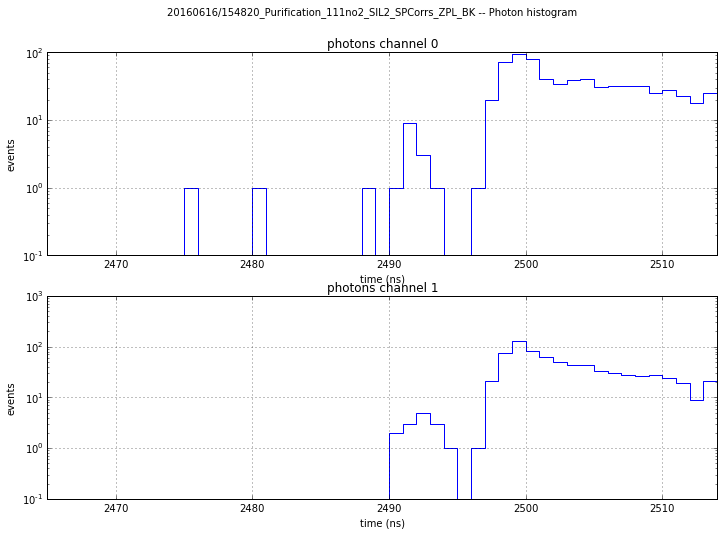

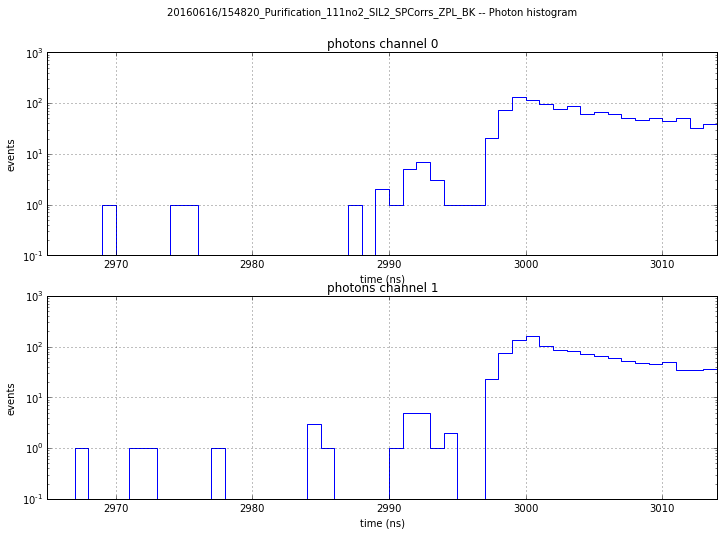

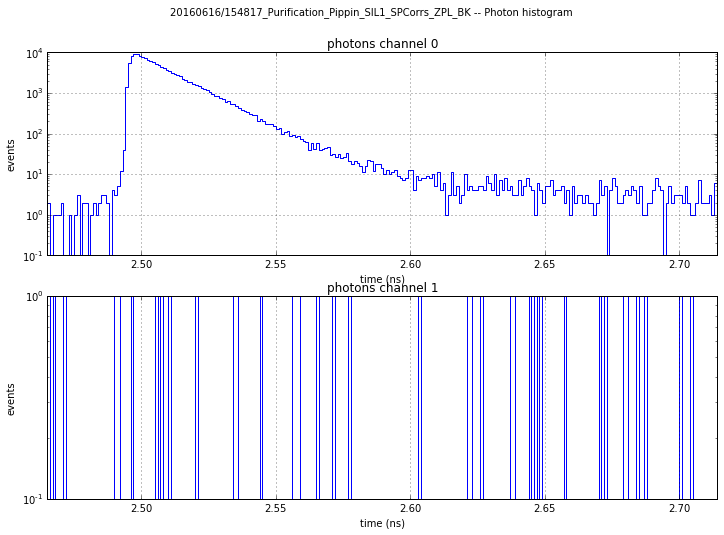

In [3]:
pq_plots.plot_photon_hist(a.pqf,start =1965e3+500e3,  length = 50e3, hist_binsize = 1e3, save = False, log=True) #start =7480
pq_plots.plot_photon_hist(a.pqf,start =1965e3+1000e3,  length = 50e3, hist_binsize = 1e3, save = False, log=True) #start =7480
pq_plots.plot_photon_hist(b.pqf,start =1965+500,  length = 250, hist_binsize = 1, save = False, log=True) #start =7480

In [4]:
# ## check whether the plu does the job?
# pq_plots.plot_marker_filter_comparison(a.pqf,
#                           mrkr_chan = 1,
#                           start = 1900e3+500e3, #settings.bs_process_params['st_start_ch0'],  
#                           length= 0.21E6,#settings.bs_process_params['st_len']+settings.bs_process_params['pulse_sep'], 
#                           hist_binsize = 1e3,save = False,log=True)
# pq_plots.plot_marker_filter_comparison(a.pqf,
#                           mrkr_chan = 1,
#                           start = 1900e3+1000e3, #settings.bs_process_params['st_start_ch0'],  
#                           length= 0.21E6,#settings.bs_process_params['st_len']+settings.bs_process_params['pulse_sep'], 
#                           hist_binsize = 1e3,save = False,log=True)

In [5]:
sp_lt = a.pqf['/PQ_special-1'].value # Special: marker channel
ch_lt = a.pqf['/PQ_channel-1'].value # Channel: photon channel
sn_lt = a.pqf['/PQ_sync_number-1'].value # Sync number: the number of the last sync signal
st_lt = a.pqf['/PQ_sync_time-1'].value # Sync time: time that has passed since the last sync signal
#tt_lt = a.pqf['/PQ_time-1'].value 

In [6]:
photon_channel = 2 # 0 or 1; 2 means both HH detectors
st_start = 1965e3+500e3#2763e3
st_len       = 50e3 #50 ns
st_len_w2    = 50e3
#p_sep       = 2500e3 #600 ns
p_sep        =500e3#2732e3 #XXX why has this changed?

In [7]:
reload(ppq)

sync_filter = a.filter_pq_data_from_adwin_syncs()
sp_filtered = sp_lt[sync_filter]
ch_filtered = ch_lt[sync_filter]
sn_filtered = sn_lt[sync_filter]
st_filtered = st_lt[sync_filter]

print 'Cumulative clicks'
print len(sp_filtered),len(ch_filtered),len(sn_filtered),len(st_filtered)

IndexError: index out of bounds

In [8]:
### filter the PQ data: Return an array which is True at each position where an event was in a window
st_fltr_w1 = (st_filtered > st_start)  & (st_filtered < (st_start  + st_len)) & (sp_filtered == 0)
st_fltr_w2 = (st_filtered > st_start + p_sep)  & (st_filtered < (st_start + p_sep + st_len_w2)) & (sp_filtered == 0)
st_fltr_w1_ch1 = st_fltr_w1 & (ch_filtered == 1)
st_fltr_w1_ch0 = st_fltr_w1 & (ch_filtered == 0)
st_fltr_w2_ch1 = st_fltr_w2 & (ch_filtered == 1)
st_fltr_w2_ch0 = st_fltr_w2 & (ch_filtered == 0)
### filter the numbers according to 
w1_sn = sn_filtered[st_fltr_w1]
w2_sn = sn_filtered[st_fltr_w2]
noof_w1 = np.sum(st_fltr_w1)
noof_w2 = np.sum(st_fltr_w2)


### trick add one element to the w1 filter to shift both on top of each other (can alter be erased)
st_fltr_w1_ch1 = np.insert(st_fltr_w1_ch1,0,False); st_fltr_w1_ch0 = np.insert(st_fltr_w1_ch0,0,False)
# st_fltr_w2_ch0 = np.append(st_fltr_w2_ch0,False);st_fltr_w2_ch1 = np.append(st_fltr_w2_ch1,False)


### get only the late clicks here
st_fltr_psi_plus   = np.logical_or(np.logical_and(st_fltr_w1_ch1[:-1],st_fltr_w2_ch1),np.logical_and(st_fltr_w1_ch0[:-1],st_fltr_w2_ch0))
st_fltr_psi_minus  = np.logical_or(np.logical_and(st_fltr_w1_ch0[:-1],st_fltr_w2_ch1),np.logical_and(st_fltr_w1_ch1[:-1],st_fltr_w2_ch0))


# print np.sum(np.logical_and(st_fltr_w1_ch1,st_fltr_w2_ch1)),np.logical_and(st_fltr_w1_ch1,st_fltr_w2_ch0)
print 'clicks in each selected windows', noof_w1,noof_w2
print 'psi_minus events', np.sum(st_fltr_psi_minus[1:-1])
print 'psi_plus events', np.sum(st_fltr_psi_plus[1:-1])


NameError: name 'st_filtered' is not defined

In [192]:
### get RO results
# psi_plus syncs
sn_psi_p = sn_filtered[st_fltr_psi_plus]
# psi_minus syncs
sn_psi_m = sn_filtered[st_fltr_psi_minus]


a_fltr_p_1 = b.filter_adwin_data_from_pq_syncs(sn_psi_p)
a_fltr_p_2 = a.filter_adwin_data_from_pq_syncs(sn_psi_p)
print 'No of events psi_plus', len(a_fltr_p_1[0])
a_fltr_m_1 = b.filter_adwin_data_from_pq_syncs(sn_psi_m)
a_fltr_m_2 = a.filter_adwin_data_from_pq_syncs(sn_psi_m)
print 'No of events psi_minus', len(a_fltr_m_1[0])

p_1_ro0 = b.agrp['ssro_results'].value[a_fltr_p_1[0]]
p_2_ro0 = a.agrp['ssro_results'].value[a_fltr_p_2[0]]
m_1_ro0 = b.agrp['ssro_results'].value[a_fltr_m_1[0]]
m_2_ro0 = a.agrp['ssro_results'].value[a_fltr_m_2[0]]

print 'p_correlated for psi_minus', float(np.sum(np.equal(m_1_ro0,m_2_ro0)))/len(m_1_ro0)
print 'p_correlated for psi_plus', float(np.sum(np.equal(p_1_ro0,p_2_ro0)))/len(p_1_ro0)
# print len(b.filter_adwin_data_from_pq_syncs(w1_sn)[1]), len(b.filter_adwin_data_from_pq_syncs(w2_sn)[1])

# adwin_filter_w1 = a.filter_adwin_data_from_pq_syncs(w1_sn)
# adwin_filter_w2 = a.filter_adwin_data_from_pq_syncs(w2_sn)
# noof_reps2= a.agrp['completed_reps'].value*a.g['joint_params'].attrs['LDE_attempts']
# noof_w1_ro0 = np.sum(a.agrp['ssro_results'].value[adwin_filter_w1[0]])
# noof_w2_ro0 = np.sum(a.agrp['ssro_results'].value[adwin_filter_w2[0]])
# print len(a.filter_adwin_data_from_pq_syncs(w1_sn)[1]), len(a.filter_adwin_data_from_pq_syncs(w2_sn)[1])

No of events psi_plus 1
No of events psi_minus 1
p_correlated for psi_minus 1.0
p_correlated for psi_plus 0.0


In [413]:
reload(ppq)

if is_lt3_measurement == True:  
    ssro_calib_folder  = tb.latest_data('SSROCalib', folder ='Z:\data')
    ro_time = b.agrp.attrs['E_RO_durations'][0]
else:
    ssro_calib_folder  = tb.latest_data('SSROCalib')
    ro_time = a.agrp.attrs['E_RO_durations'][0]
#sweep_index , what does it do??
ssro_fids = ppq.get_analysed_fast_ssro_calibration(ssro_calib_folder,readout_time = ro_time)

In [ ]:
#### put readout corrected analysis here.

In [415]:
hist(st_lt[fltr_ro][np.in1d(ro0_sn,w2_sn)])